In [1]:
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/Hanya/Documents/stratis_price.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,9.91,10.17,9.02,9.13,"21,055,000","978,923,000"
2018-02-19,9.26,10.18,9.10,9.95,"22,415,800","914,001,000"
2018-02-18,9.76,9.78,8.82,9.26,"14,139,400","963,499,000"
2018-02-17,9.53,9.95,9.42,9.76,"19,415,600","940,978,000"
2018-02-16,9.50,9.79,9.00,9.56,"14,430,300","938,100,000"


In [5]:
df.index

DatetimeIndex(['2018-02-20', '2018-02-19', '2018-02-18', '2018-02-17',
               '2018-02-16', '2018-02-15', '2018-02-14', '2018-02-13',
               '2018-02-12', '2018-02-11',
               ...
               '2016-08-21', '2016-08-20', '2016-08-19', '2016-08-18',
               '2016-08-17', '2016-08-16', '2016-08-15', '2016-08-14',
               '2016-08-13', '2016-08-12'],
              dtype='datetime64[ns]', name='Date', length=558, freq=None)

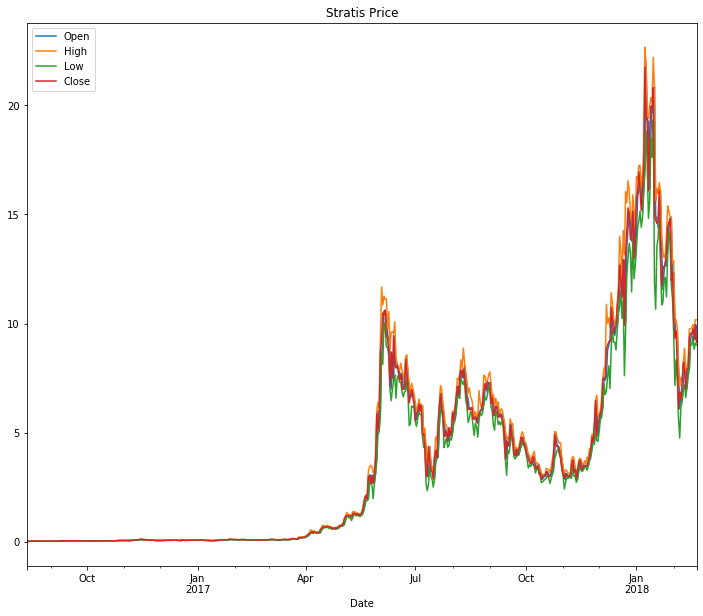

In [6]:
df.plot(figsize=(12,10),title='Stratis Price')

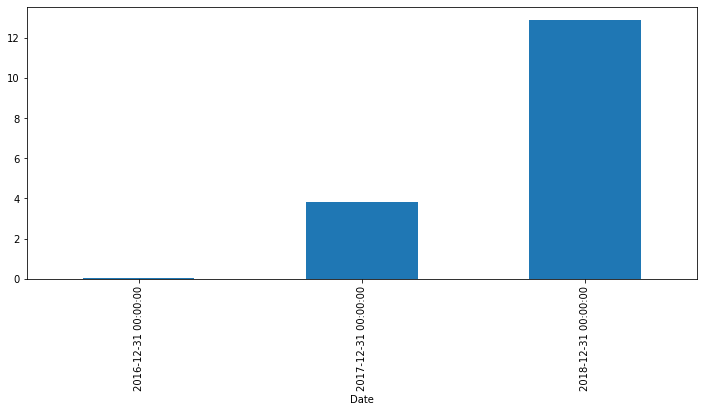

In [7]:
df['Close'].resample('Y').mean().plot.bar(figsize=(12,5))

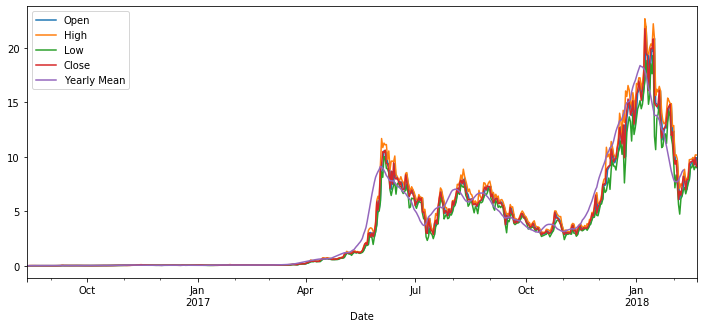

In [8]:
df['Yearly Mean']=df['Close'].rolling(window=12).mean()
df.plot(figsize=(12,5))

### Augmented Dickey Fuller Test 1

In [10]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

C:\Users\Hanya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.29501086569769774, True)

### Augmented Dickey Fuller Test 2 

In [11]:
from statsmodels.tsa.stattools import adfuller
series_litecoin = df['Close'].values
result = adfuller(series_litecoin, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key,value in result[4].items():
      print('Critical Values: ')
      print(f'{key},{value}')

ADF Statistic: -1.7494182699925471
n_lags: 0.40584720466504953
p-value: 0.40584720466504953
Critical Values: 
1%,-3.442472769145813
Critical Values: 
5%,-2.8668873212324817
Critical Values: 
10%,-2.5696179384812297


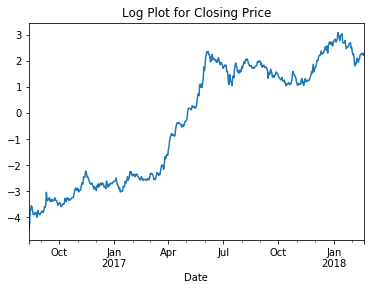

In [12]:
lnclose=np.log(df['Close'])
lnclose
lnclose.plot(title='Log Plot for Closing Price')
#adjusting for volatility

### Augmented Dickey Fuller Test Post Differencing 

In [13]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

C:\Users\Hanya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.29501086569769774, True)

In [14]:
ln_list = lnclose.to_list()

In [15]:
from statsmodels.tsa.stattools import acf,pacf
import pandas as pd

C:\Users\Hanya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


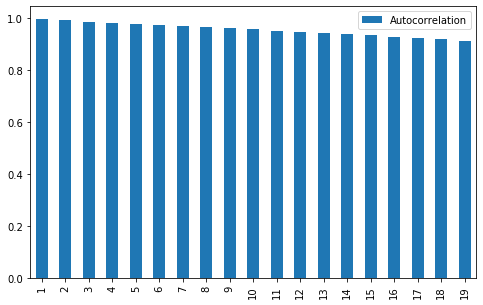

In [16]:
acf_1 = acf(lnclose)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Gentle decrease downwards for each lag

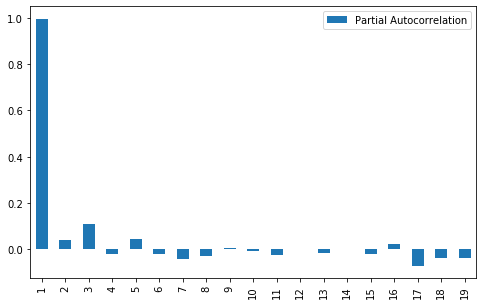

In [17]:
pacf_1 = pacf(lnclose)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Sudden decrease downwards between first and subsequent lags suggesting we have a stationary AR1 time series

In [18]:
import matplotlib.pyplot as plt

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Stratis Coin Integrated by order of 1')

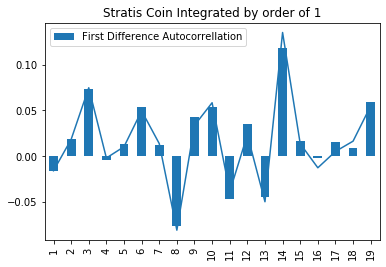

In [24]:
lnclose_diff=lnclose-lnclose.shift()
diff=lnclose_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrellation']
test_df.index +=1
test_df.plot.bar()
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.title('Stratis Coin Integrated by order of 1')
#Integrated order of 1

In [26]:
import matplotlib.pyplot as plt

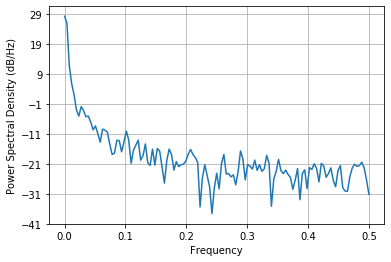

In [31]:
from spectrum import *
psd = WelchPeriodogram(ln_list, 256)

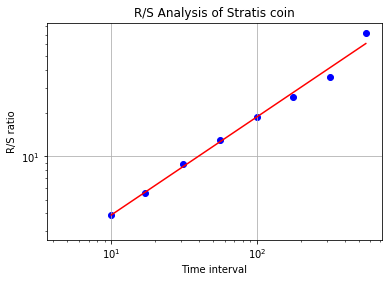

H=0.6828, c=0.8096


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

series = ln_list

H, c, data = compute_Hc(series, simplified=True)

# Plot
f, g = plt.subplots()
g.plot(data[0], c*data[0]**H, color="red")
g.scatter(data[0], data[1], color="blue")
g.set_xscale('log')
g.set_yscale('log')
g.set_xlabel('Time interval')
g.set_ylabel('R/S ratio')
g.grid(True)
plt.title('R/S Analysis of Stratis coin')
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [34]:
import nolds

In [35]:
h = nolds.dfa(ln_list)

In [36]:
h

0.6162944289428023

In [37]:
print ('        #### Hurst Calculation Results for Dash #####    ')
print ('============================================================')
print ('  DFA Hurst Parameter Calculation : ',h)
print ('  R/S Analysis Hurst  Calculation : ',H)

        #### Hurst Calculation Results for Dash #####    
  DFA Hurst Parameter Calculation :  0.6162944289428023
  R/S Analysis Hurst  Calculation :  0.6828481374097123
